## Check CUDA version

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Install specific version of CUDA

In [ ]:
%cd /usr/local/
!tar -xzvf "/content/drive/My Drive/YOLOv4/cudnn-10.1-linux-x64-v7.6.5.32 (1).tgz"

!chmod a+r /usr/local/cuda/include/cudnn.h
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

%cd /content/

/usr/local
tar (child): /content/drive/My Drive/YOLOv4/cudnn-10.1-linux-x64-v7.6.5.32 (1).tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
chmod: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory
cat: /usr/local/cuda/include/cudnn.h: No such file or directory
/content


## Check OpenCV version

In [ ]:
import cv2
cv2.__version__

'4.1.2'

## Check GPU version

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Final check for CUDA version

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Kaggle API connect, Dataset download and unzip

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle #
# ! cp /content/drive/MyDrive/AIML_Research_Projects_&_Publication/4_Leukemia_March_2022/Codes/kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# Download Dataset
! kaggle datasets download mehradaria/leukemia

# Unzip
! unzip leukemia.zip

Streaming output truncated to the last 5000 lines.
  inflating: Original/Pre/WBC-Malignant-Pre-024.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-025.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-026.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-027.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-028.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-029.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-030.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-031.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-032.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-033.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-034.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-035.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-036.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-037.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-038.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-039.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-040.jpg  
  inflating: Original/Pre/WBC-M

## Initial Dependencies

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import os #file operation
import math
import shutil #Move files one directory to others
import glob

In [ ]:
# Count the number of images in the respective classes
def ClassFreq(ROOT_DIR):
  # ROOT_DIR = ""
  number_of_images = {}

  # os.listdir() returns the elements on the specific folder
  for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

  # List of images according to the subdirectory
  # number_of_images.items()

  # Count class   #add len() in above loop
  print(number_of_images.items())

ClassFreq("/content/Original")

dict_items([('Pre', 963), ('Benign', 504), ('Early', 985), ('Pro', 804)])


In [ ]:
os.listdir("/content/Original")

['Pre', 'Benign', 'Early', 'Pro']

## Dataset Splitting

#### Training: 70%, Validation: 15%, Testing: 15%

In [ ]:
# shutil.rmtree("/content/train") 
# shutil.rmtree("/content/test")
# shutil.rmtree("/content/val")

In [ ]:
ROOT_DIR = "/content/Original"
number_of_images = {}
# os.listdir() returns the elements on the specific folder
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
print(number_of_images.items())

# Creates directory for train, test and validation set
def dataFolder(path, split):
  # Create separate folders for Training, Validation and Testing
  if not os.path.exists("./"+path): # When <path> directory is not available in the root directory
    os.mkdir("./"+path)             # make directory

    for dir in os.listdir(ROOT_DIR): #For the classes in the Root directory
      os.makedirs("./"+path+"/"+dir)      # create new directoris
      
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split*number_of_images[dir])-5), replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+path, dir)
        shutil.copy(O,D)
        os.remove(O)
        
  else:
    print(f"{path} directory already exists")

  print(f"{path} directory has been created")


#Split Dataset and create directory
dataFolder("train",0.7)
dataFolder("val",0.15)
dataFolder("test",0.15)


#Show data frequency
ClassFreq("/content/train")
ClassFreq("/content/val")
ClassFreq("/content/test")


dict_items([('Pre', 963), ('Benign', 504), ('Early', 985), ('Pro', 804)])
train directory has been created
val directory has been created
test directory has been created
dict_items([('Pre', 669), ('Benign', 347), ('Early', 684), ('Pro', 557)])
dict_items([('Pre', 139), ('Benign', 70), ('Early', 142), ('Pro', 115)])
dict_items([('Pre', 139), ('Benign', 70), ('Early', 142), ('Pro', 115)])


In [ ]:
#Count remaining Images
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
print(number_of_images.items())

dict_items([('Pre', 16), ('Benign', 17), ('Early', 17), ('Pro', 17)])


# Building CNN model from scrach

In [ ]:
# import keras
# from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
# from keras.models import Sequential
# from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [ ]:
# # CNN Model
# model = Sequential()

# model.add(Conv2D(filters = 16, kernel_size = (3,3), activation =  "relu", input_shape = (224,224,3), padding="same"))

# model.add(Conv2D(filters = 36, kernel_size = (3,3), activation =  "relu"))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 64, kernel_size = (3,3), activation =  "relu"))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 128, kernel_size = (3,3), activation =  "relu"))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Dropout(rate=0.25))

# model.add(Flatten())
# model.add(Dense(units=64, activation="relu"))
# model.add(Dropout(rate=0.25))

# model.add(Dense(units=4, activation="softmax"))

# model.summary()

# model.compile(optimizer = "adam", loss= keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

# Preprocessing: Preparing Image Data Generator

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
def preprocessingImages(path):
  """
  Input: path
  Output: Generated Data
  """
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range=0.2,preprocessing_function=preprocess_input, horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size = 32,  class_mode= "categorical")
  train_step = image.n//32

  return image, train_step

In [ ]:
train_path = "/content/train"
test_path = "/content/test"
val_path = "/content/val"

train_data, train_step = preprocessingImages(train_path)

Found 2257 images belonging to 4 classes.


In [ ]:
def ScaleImages(path):
  """
  Input: path
  Output: Generated Data
  """
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size = 32, class_mode= "categorical")
  steps = image.n//32
  return image, steps

val_data, val_steps = ScaleImages(val_path)
test_data, test_steps = ScaleImages(test_path)

Found 466 images belonging to 4 classes.
Found 466 images belonging to 4 classes.


In [ ]:
# Show the labels
train_data.class_indices

{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}

In [ ]:
print(test_data.class_indices)
print(val_data.class_indices)

{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}
{'Benign': 0, 'Early': 1, 'Pre': 2, 'Pro': 3}


# model building

In [ ]:
# Downloading MobileNet model

base_model = MobileNet(input_shape=(224,224,3), include_top=False)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
# for 
for layer in base_model.layers:
  layer.trainable = False

base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
X= Flatten()(base_model.output)
X= Dense(units=4, activation="softmax")(X)

model = Model(base_model.input, X)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer="rmsprop", loss=keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [ ]:
#  Call Back
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Model Checkpoint
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only = True)

# Early Stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience= 3, verbose=1)

cb = [mc,es]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=train_step,
                           epochs = 30,
                           validation_data = val_data,
                           validation_steps=val_steps,
                           callbacks=cb)

Epoch 1/30
70/70 [==============================] - ETA: 0s - loss: 3.7072 - accuracy: 0.7542
Epoch 1: val_accuracy improved from -inf to 0.87277, saving model to bestmodel.h5
70/70 [==============================] - 100s 1s/step - loss: 3.7072 - accuracy: 0.7542 - val_loss: 0.9503 - val_accuracy: 0.8728
Epoch 2/30
70/70 [==============================] - ETA: 0s - loss: 1.3395 - accuracy: 0.8804
Epoch 2: val_accuracy improved from 0.87277 to 0.93080, saving model to bestmodel.h5
70/70 [==============================] - 97s 1s/step - loss: 1.3395 - accuracy: 0.8804 - val_loss: 0.6097 - val_accuracy: 0.9308
Epoch 3/30
70/70 [==============================] - ETA: 0s - loss: 0.7753 - accuracy: 0.9312
Epoch 3: val_accuracy improved from 0.93080 to 0.97991, saving model to bestmodel.h5
70/70 [==============================] - 95s 1s/step - loss: 0.7753 - accuracy: 0.9312 - val_loss: 0.1792 - val_accuracy: 0.9799
Epoch 4/30
70/70 [==============================] - ETA: 0s - loss: 0.5620 - a

In [ ]:
#  Load the best model
from keras.models import load_model

best_model_path = "/content/bestmodel.h5"
model = load_model(best_model_path)

# Accuracy
acc = model.evaluate_generator(test_data)[1]

print(acc)

# Loss
los = model.evaluate_generator(test_data)[0]

print(los)

0.9742489457130432


0.23515760898590088


In [ ]:
# import shutil
# # shutil.make_archive(test_downloaded, 'zip', test)

# !zip -r /content/test_downloaded.zip /content/test



  adding: content/test/ (stored 0%)
  adding: content/test/Pre/ (stored 0%)
  adding: content/test/Pre/WBC-Malignant-Pre-362.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-871.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-695.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-117.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-757.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-822.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-870.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-881.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-779.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-162.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-958.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-400.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-686.jpg (deflated 1%)
  adding: content/test/Pre/WBC-Malignant-Pre-598.jpg 

In [ ]:
# from google.colab import files
# files.download("/content/test_downloaded.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Model Graphical Interpritation
h= hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

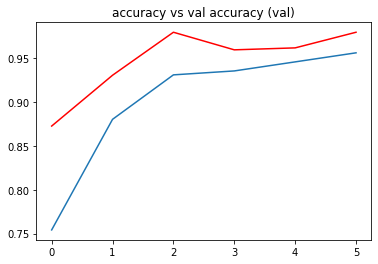

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"], c="red")


plt.title("accuracy vs val accuracy (val)")
plt.show()
         

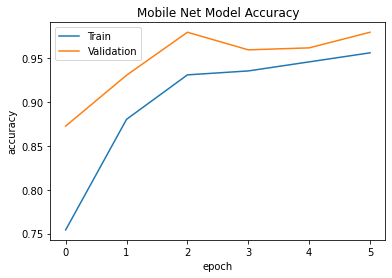

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy --- SAVE
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Mobile Net Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("MobileNet_Accuracy2.png")
plt.show()


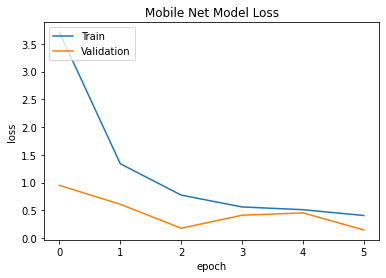

In [ ]:
# summarize history for loss --- SAVE
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Mobile Net Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("MobileNet_Validation2.png")
plt.show()


(1, 224, 224, 3)
3


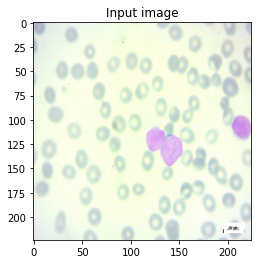

In [ ]:
# Random Check
path = "/content/test/Pro/WBC-Malignant-Pro-005.jpg"
from keras.preprocessing.image import load_img, img_to_array
img = load_img(path, target_size=(224,224))

input_arr = img_to_array(img)/255
# input_arr = preprocess_input(input_arr)/255
input_arr = np.array([input_arr])
print(input_arr.shape)

pred = np.argmax(model.predict(input_arr))
print(pred)
# input_arr = np.expand_dims(input_arr, axis=0)

# To display the image
plt.imshow(input_arr[0])
plt.title("Input image")
plt.show()